# Imports

In [1]:
import pymysql
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

# from dotenv import load_dotenv
# from os import getenv

In [2]:
# load_dotenv(dotenv_path='.env')

# #change db to grocery_db, telcomarketing, insurance
# conn=pymysql.connect(host=getenv('HOST'),
#                      port=int(getenv('PORT')),
#                      user=getenv('DBUSER'),
#                      passwd=getenv('DBPASSWORD'),
#                      db='sakila')

# df= pd.read_sql("SELECT * FROM actor LIMIT 10",conn)
# df.head()

# #closes the connection with the server
# conn.close()
# df.to_csv('data.csv', index=False)

In [3]:
df = pd.read_csv('telco_data.csv')

# Exploratory Data Analysis

In [4]:
df

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [8]:
df_dupe = df[df.duplicated(keep="last")]
df_dupe

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [9]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [10]:
numerical_columns=['Account length',#discrete
           'Total day minutes',#continuous
           'Total day calls',#discrete
           'Total day charge',#continuous
           'Total eve minutes',#continuous
           'Total eve calls',#discrete
           'Total eve charge',#continuous
           'Total night minutes',#continuous
           'Total night calls',#discrete
           'Total night charge',#continuous
           'Total intl minutes',#continuous
           'Total intl calls',#discrete
           'Total intl charge'#contiuous
          ]

categorical_columns=['State',#nominal
             'Area code', #nominal
             'International plan', #nominal
             'Voice mail plan', #nominal
             'Number vmail messages', #nominal
             'Customer service calls' #nominal
            ]

target_column=['Churn'] #nominal

## Functions

In [11]:
def categorical(column):
    
    plt.figure(figsize=(12,8))
    ax=sns.countplot(df[column], data=df, color='dimgray')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
        x=(p.get_height()/len(df[column]))*100
        ax.annotate((round(x,2)), (p.get_x(), p.get_height()))
    plt.xlabel(column)
    plt.ylabel('Total count')
    print(df[column].value_counts())
    
    ay=sns.countplot(x=column, data=df, hue="Churn")
    ay.set_xticklabels(ay.get_xticklabels(), rotation=45)
    for p in ax.patches:
        x=(p.get_height()/len(df[column]))*100
        ay.annotate(round(x,2), (p.get_x(), p.get_height()))
    plt.show()
    return

In [12]:
def categorical_oversized(column):
    plt.figure(figsize=(12,8))
    ax=sns.countplot(df[column], data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.xlabel(column)
    plt.ylabel('Total count')
    print(df[column].value_counts())
    return

In [13]:
def discrete(column):
    return

In [14]:
def continuous(column):
    fig, axs = plt.subplots(1,2,figsize=(15,12))
      
    sns.boxplot(data=df, x='Churn',y=column,ax=axs[0])
    sns.distplot(df.loc[df['Churn']==True,column],bins=10, label='yes', ax=axs[1])
    sns.distplot(df.loc[df['Churn']==False,column],bins=10, label='no',ax=axs[1])
    
    print(df[column].describe())
    return

## Churn

In [15]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [16]:
df['Churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

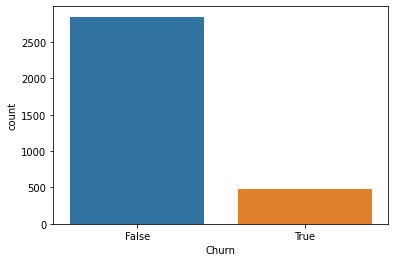

In [17]:
sns.countplot(x='Churn',data=df)
plt.show()

## States

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64


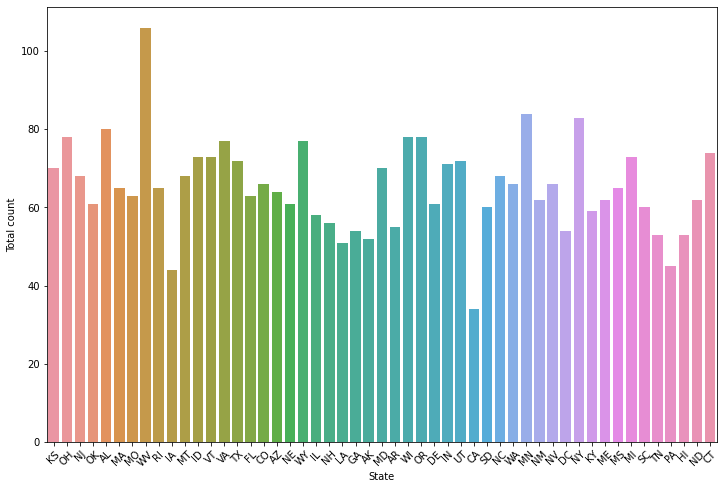

In [18]:
categorical_oversized('State')

## Area Code

415    1655
510     840
408     838
Name: Area code, dtype: int64


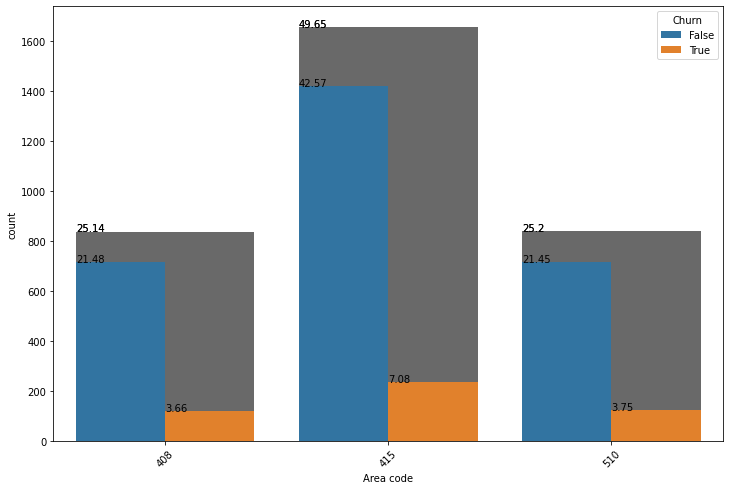

In [19]:
categorical('Area code')

## International Plan

No     3010
Yes     323
Name: International plan, dtype: int64


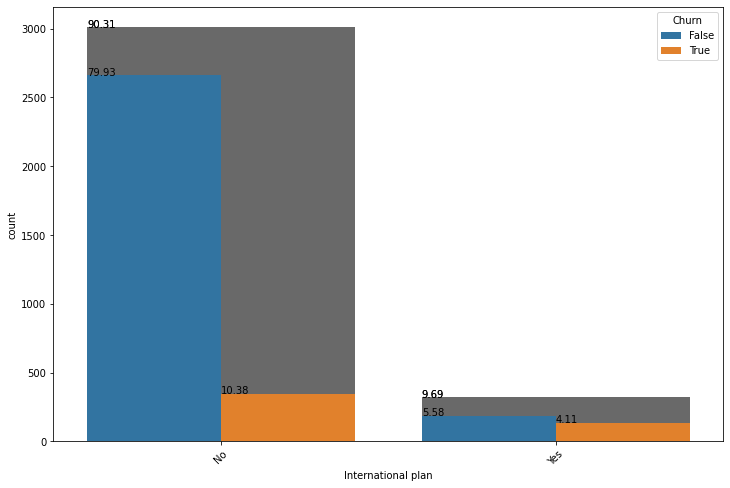

In [20]:
categorical('International plan')

## Voice Mail Plan

No     2411
Yes     922
Name: Voice mail plan, dtype: int64


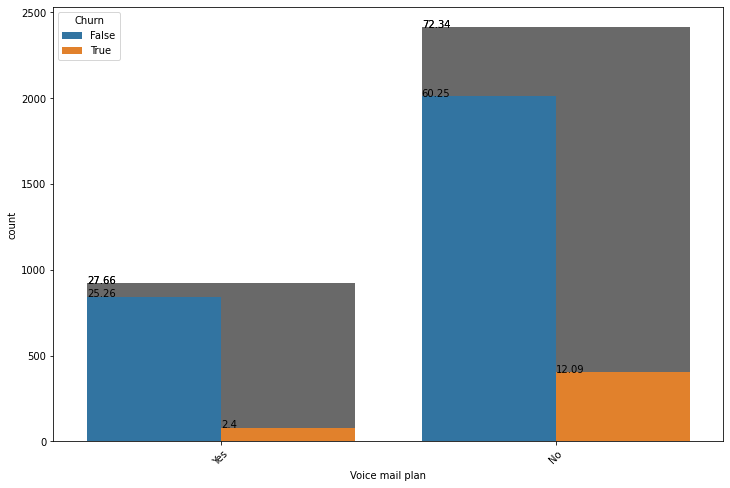

In [21]:
categorical('Voice mail plan')

## Number of Voice Mail Messages

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: Number vmail messages, dtype: int64


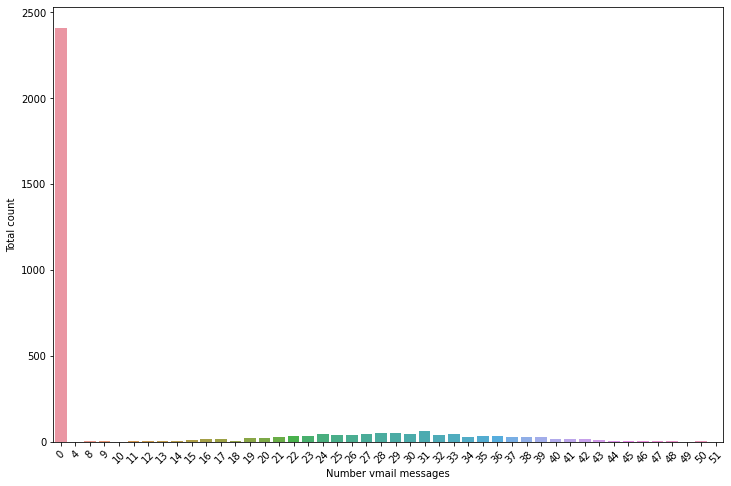

In [22]:
categorical_oversized('Number vmail messages')

## Customer Service Calls

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64


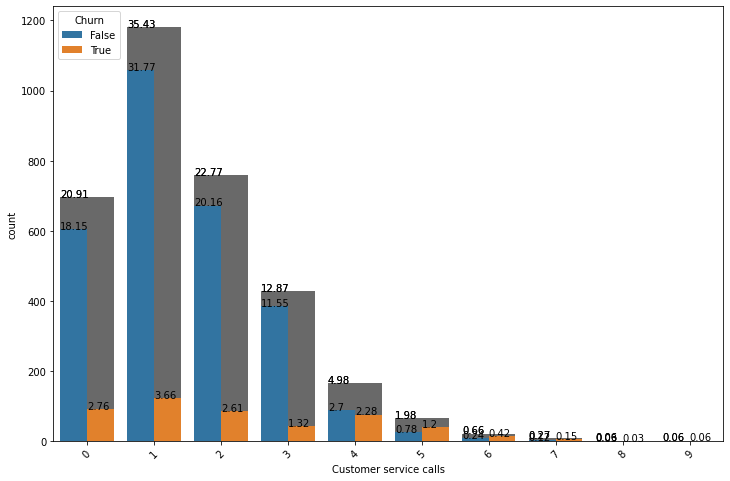

In [23]:
categorical('Customer service calls')

## Numerical data

In [26]:
plt.figure(figsize=(12,8))
boxplot = df[numerical_columnsumns].boxplot(vert=False,fontsize=15)

NameError: name 'numerical_columnsumns' is not defined

<Figure size 864x576 with 0 Axes>

## Account Length (discrete)

In [ ]:
continuous('Account length')

## Total Day Minutes

In [ ]:
continuous('Total day minutes')

## Total day calls (discrete)

In [ ]:
continuous('Total day calls')

## Total day charge

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: Total day charge, dtype: float64


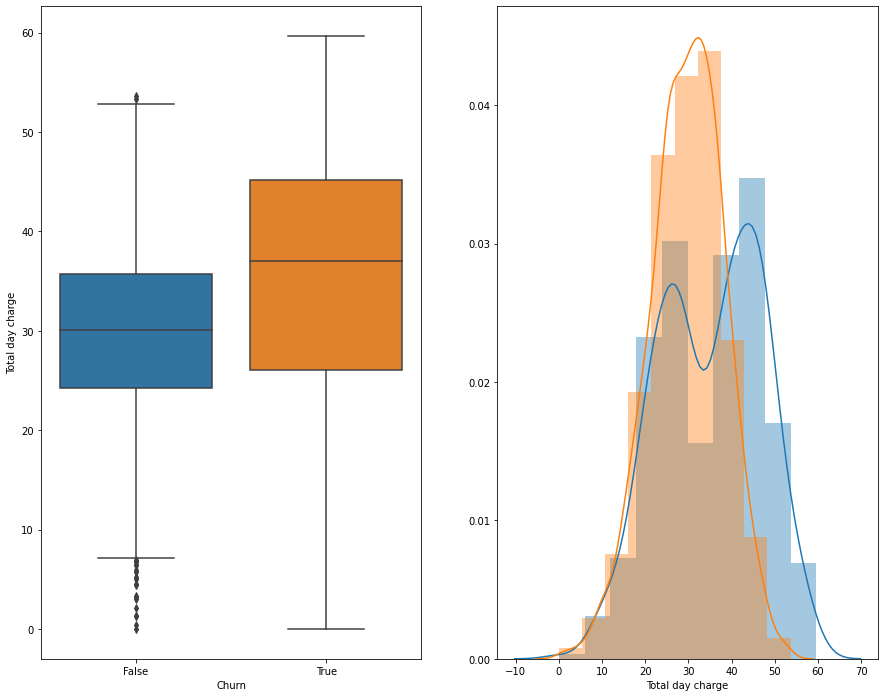

In [27]:
continuous('Total day charge')

## Total Eve minutes

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: Total eve minutes, dtype: float64


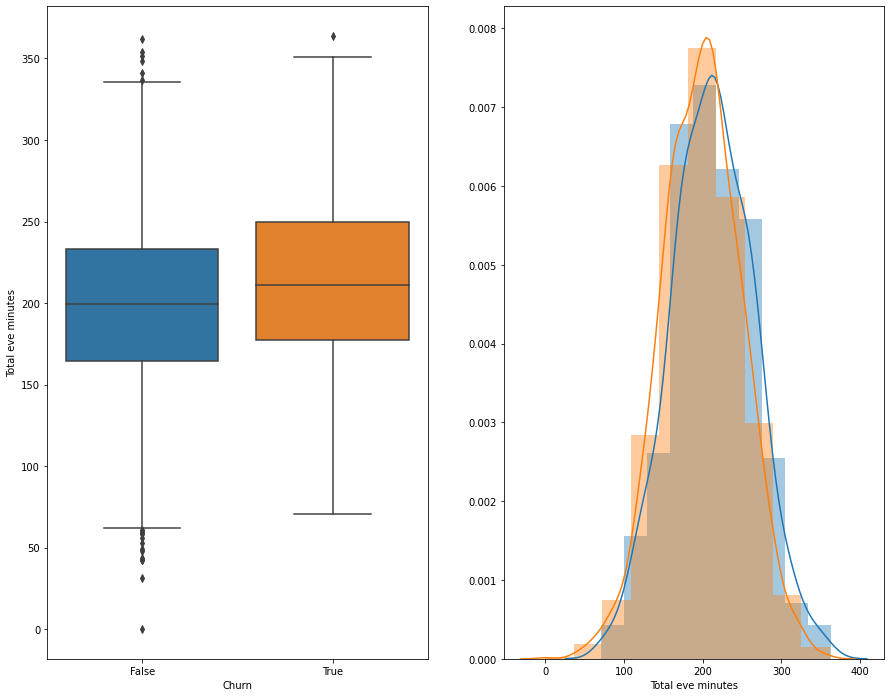

In [28]:
continuous('Total eve minutes')

## Total Eve calls (discrete)

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: Total eve calls, dtype: float64


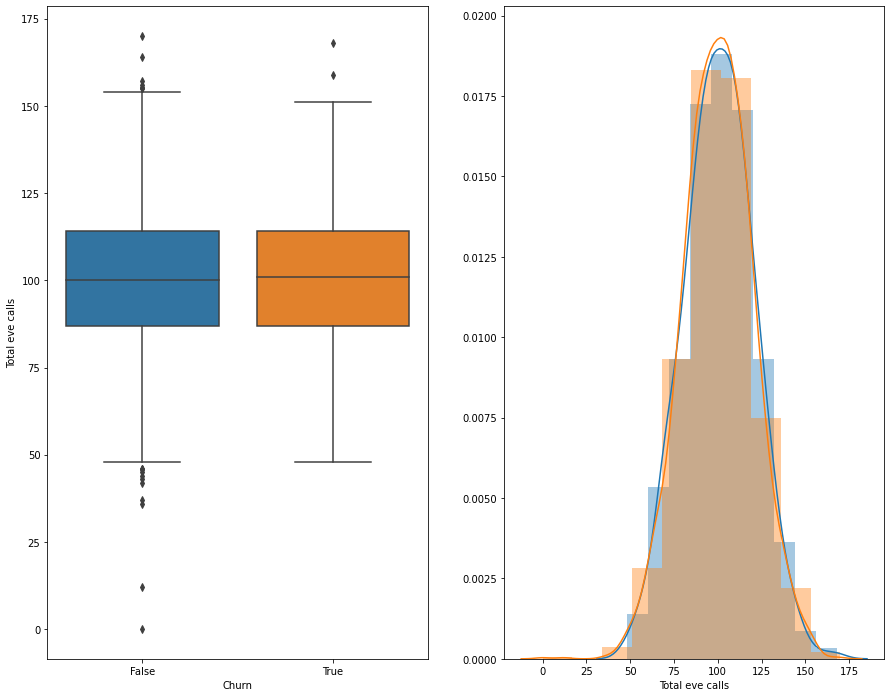

In [29]:
continuous('Total eve calls')

## Total eve charge

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: Total eve charge, dtype: float64


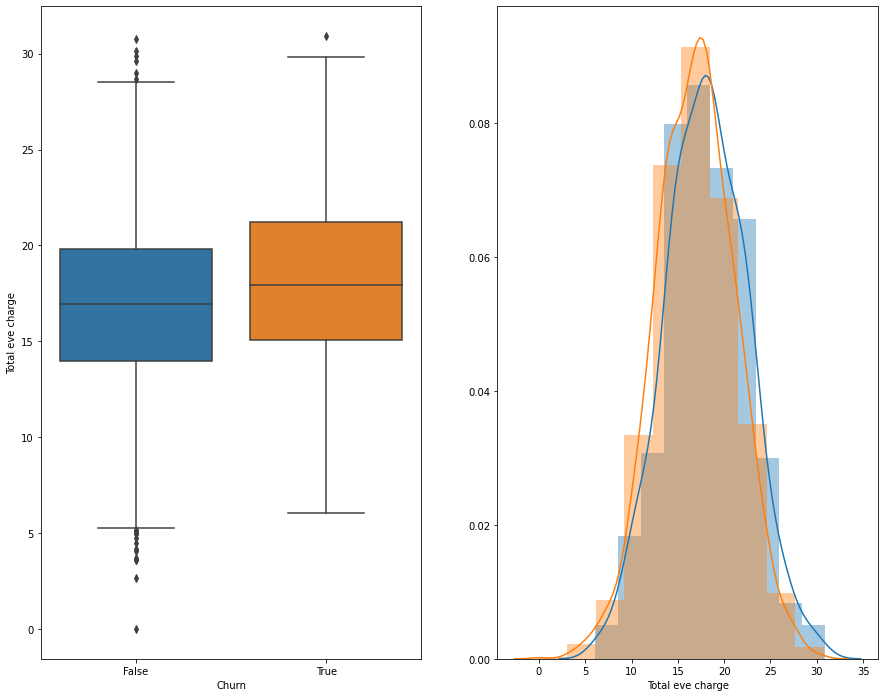

In [30]:
continuous('Total eve charge')

## Total night minutes

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Total night minutes, dtype: float64


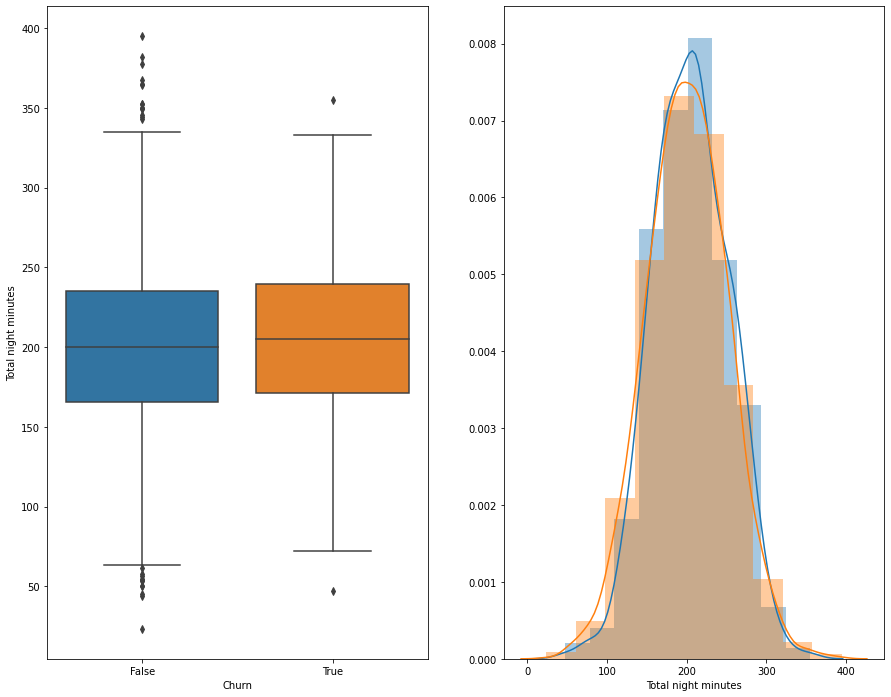

In [31]:
continuous('Total night minutes')

## Total night calls (discrete)

count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: Total night calls, dtype: float64


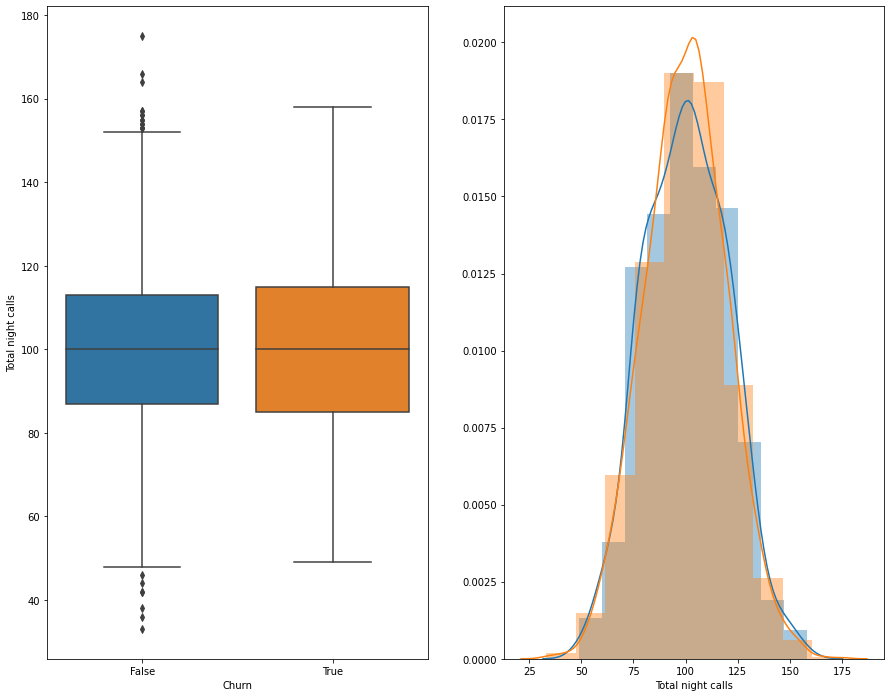

In [32]:
continuous('Total night calls')

## Total night charge

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: Total night charge, dtype: float64


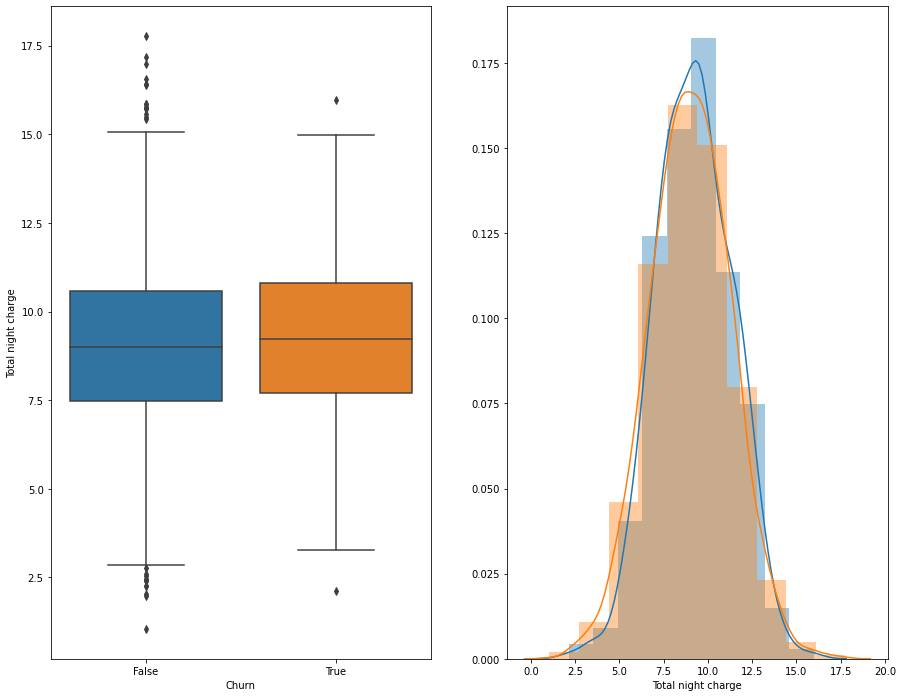

In [33]:
continuous('Total night charge')

## Total international minutes

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: Total intl minutes, dtype: float64


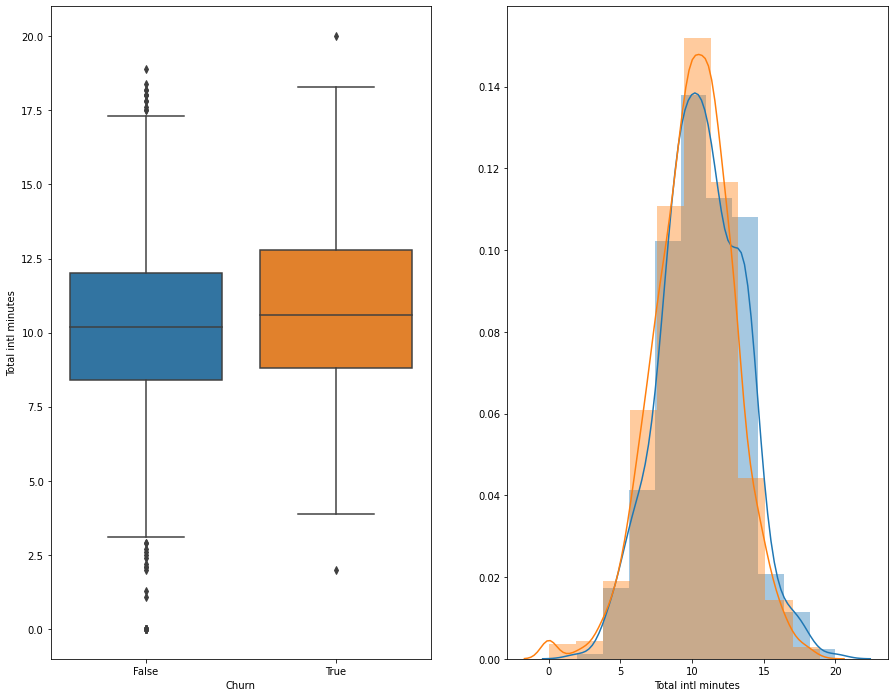

In [34]:
continuous('Total intl minutes')

## Total international calls (discrete)

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64


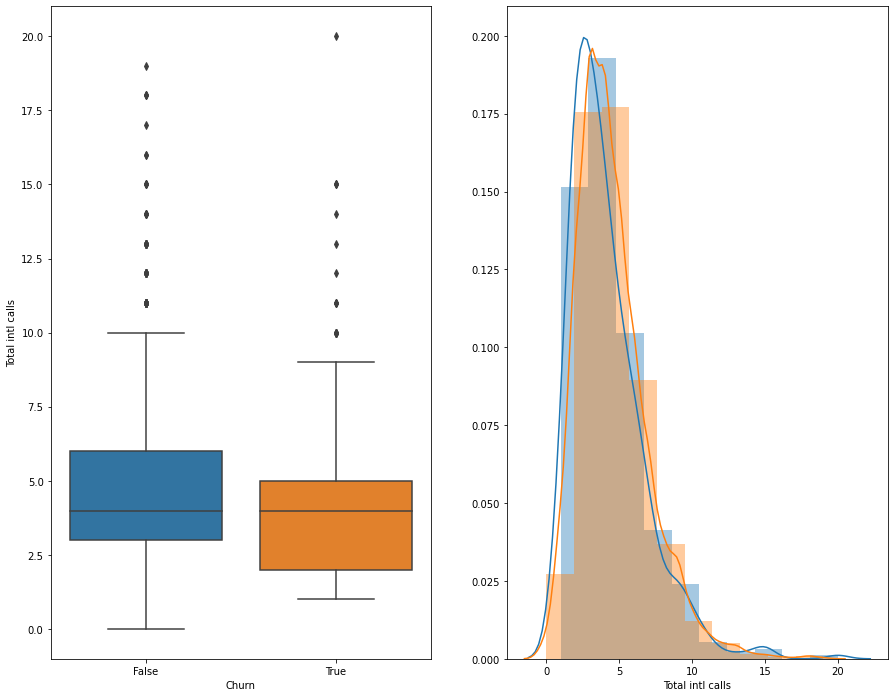

In [35]:
continuous('Total intl calls')

## Total International Charge

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: Total intl charge, dtype: float64


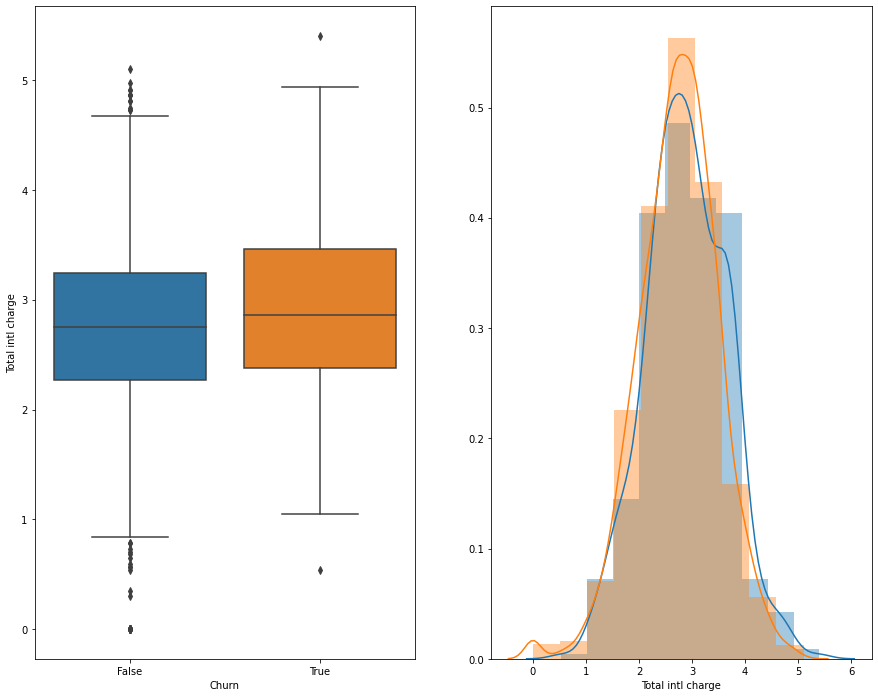

In [36]:
continuous('Total intl charge')

## Correlation Heatmap

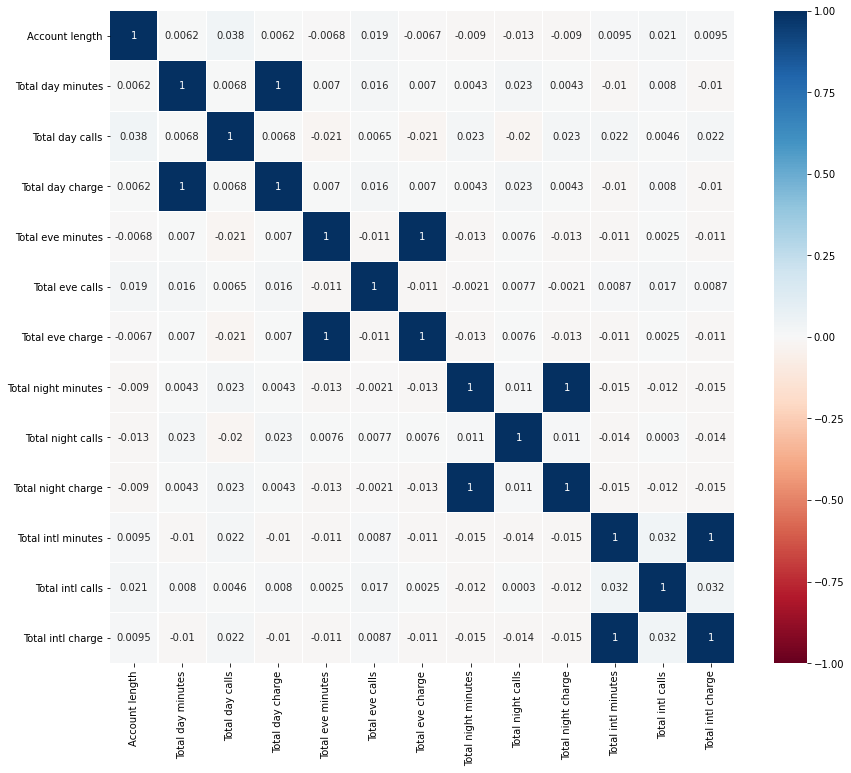

In [39]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(df[numerical_columns].corr(),linewidths=.1,cmap="RdBu", annot=True,vmin=-1)

plt.yticks(rotation=0);


## Pair Plots

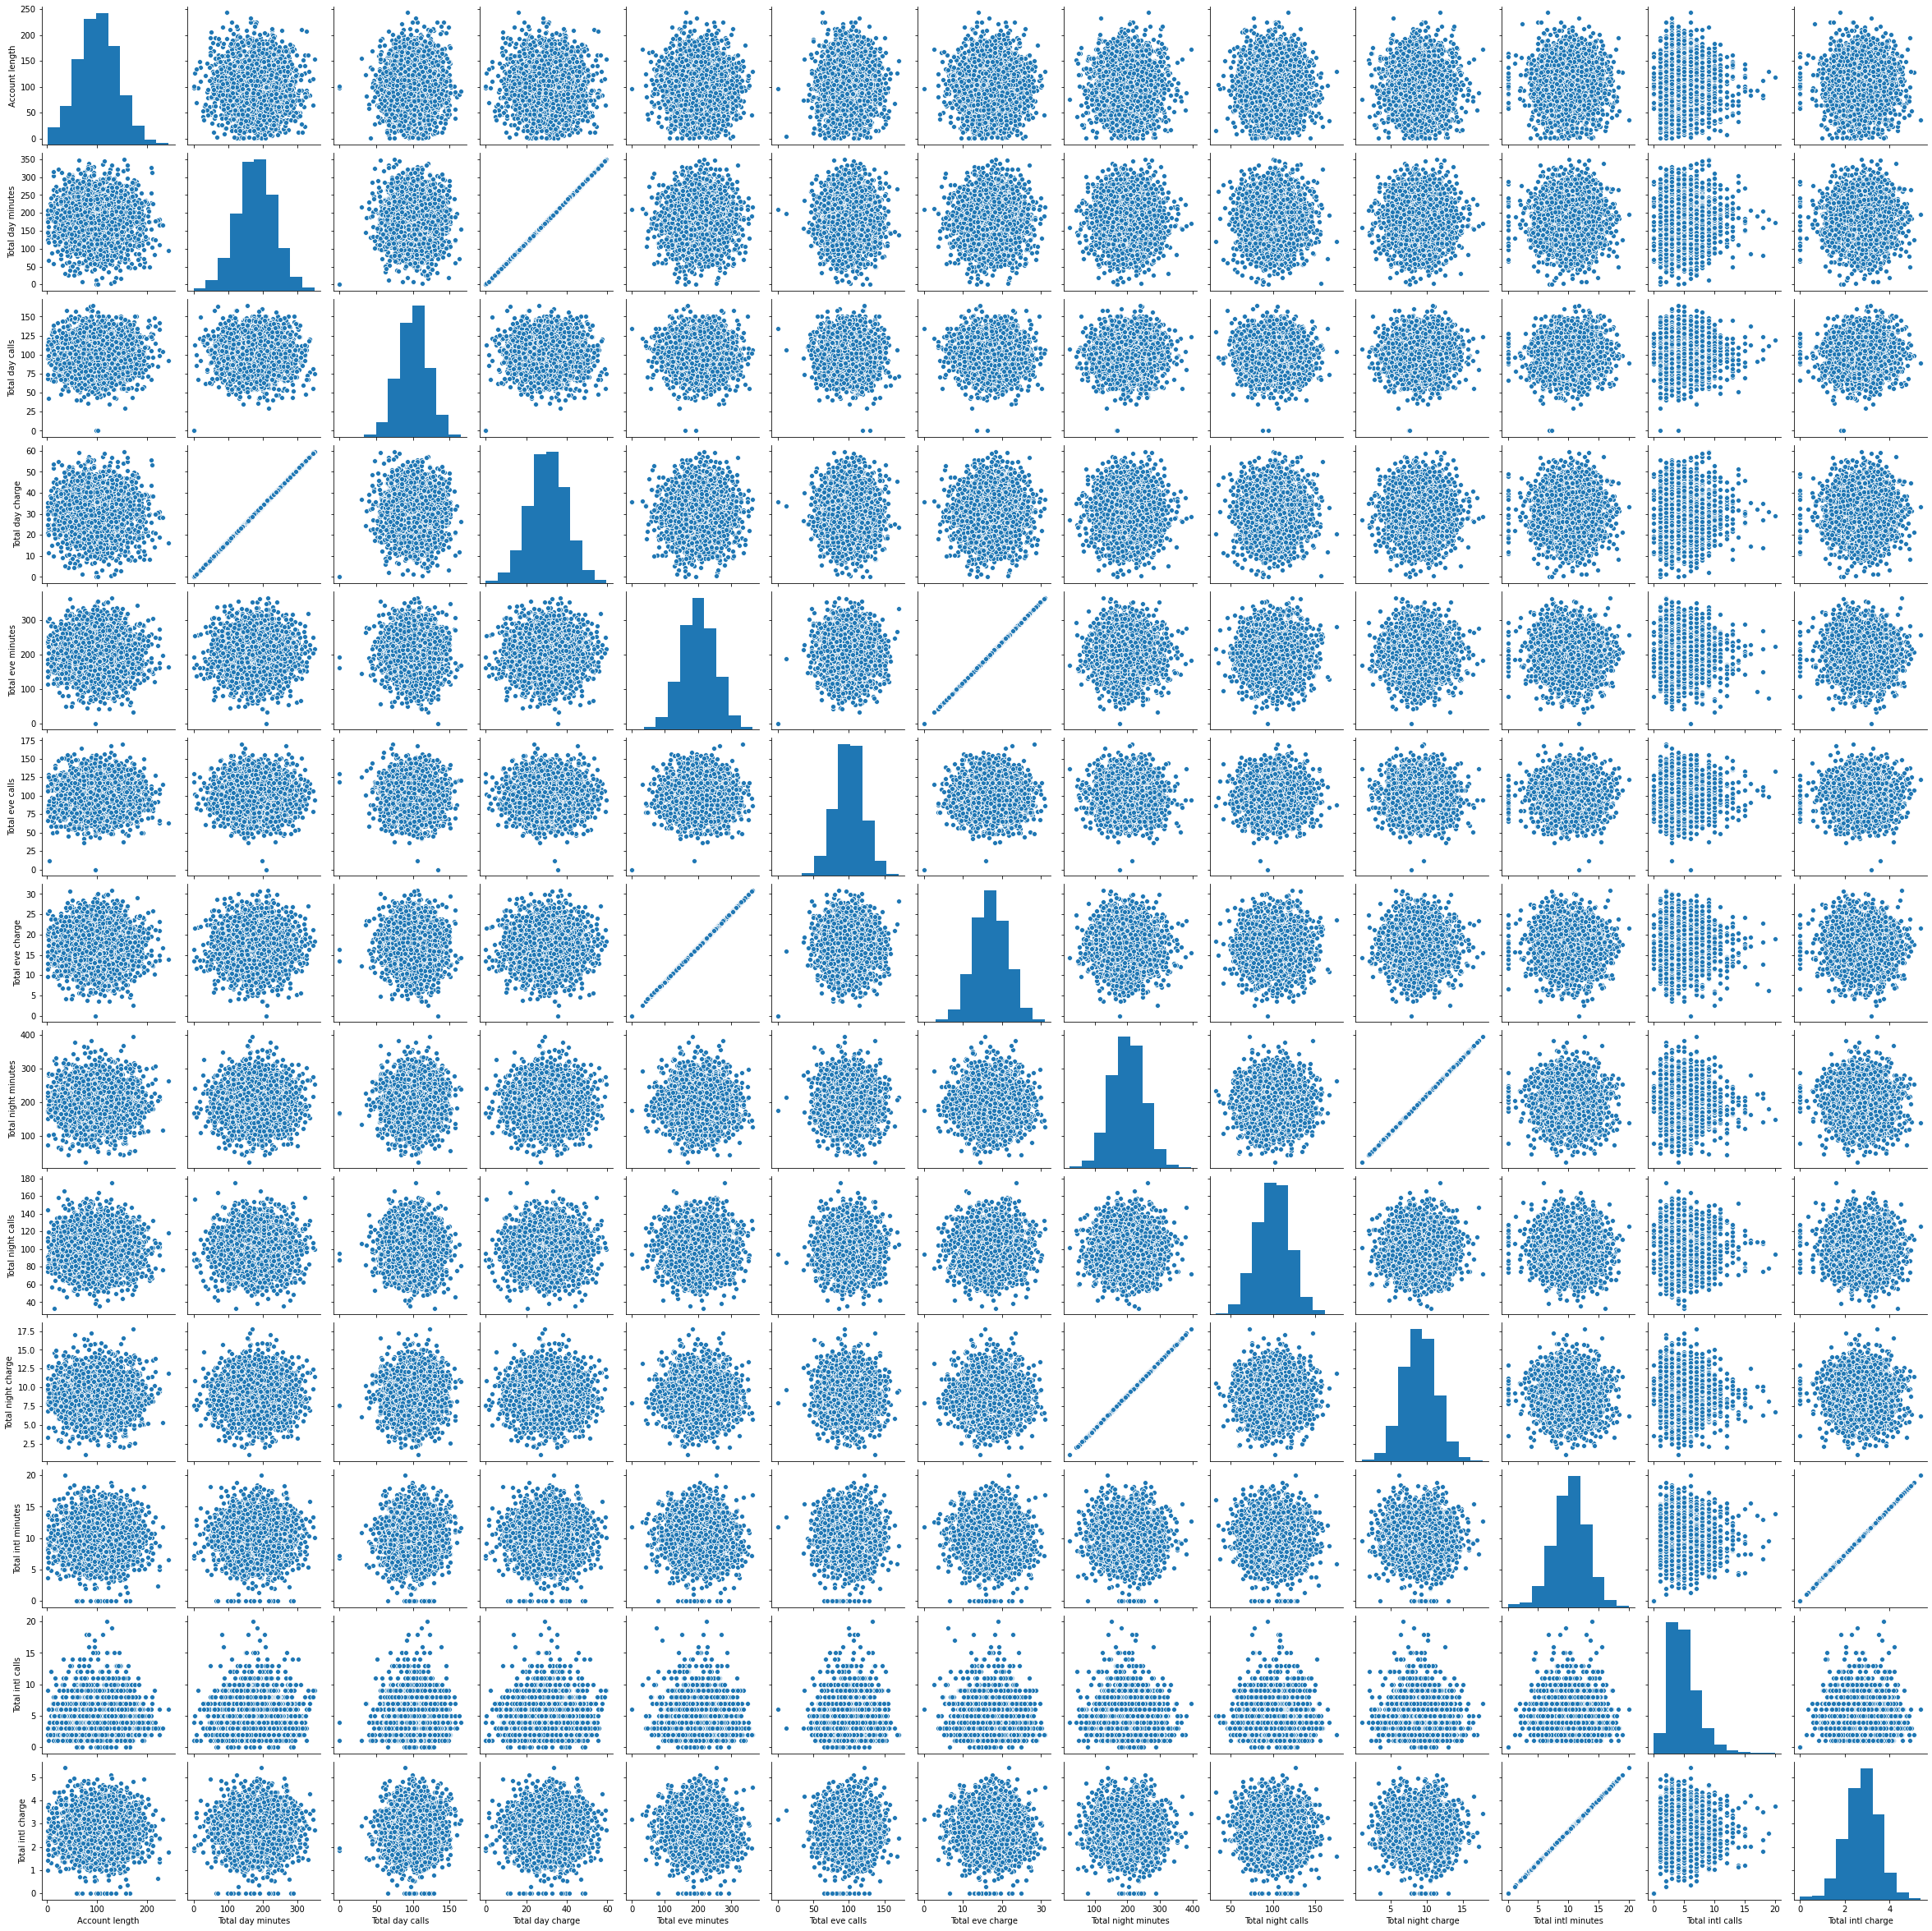

In [40]:
sns.pairplot(df[numerical_columns])

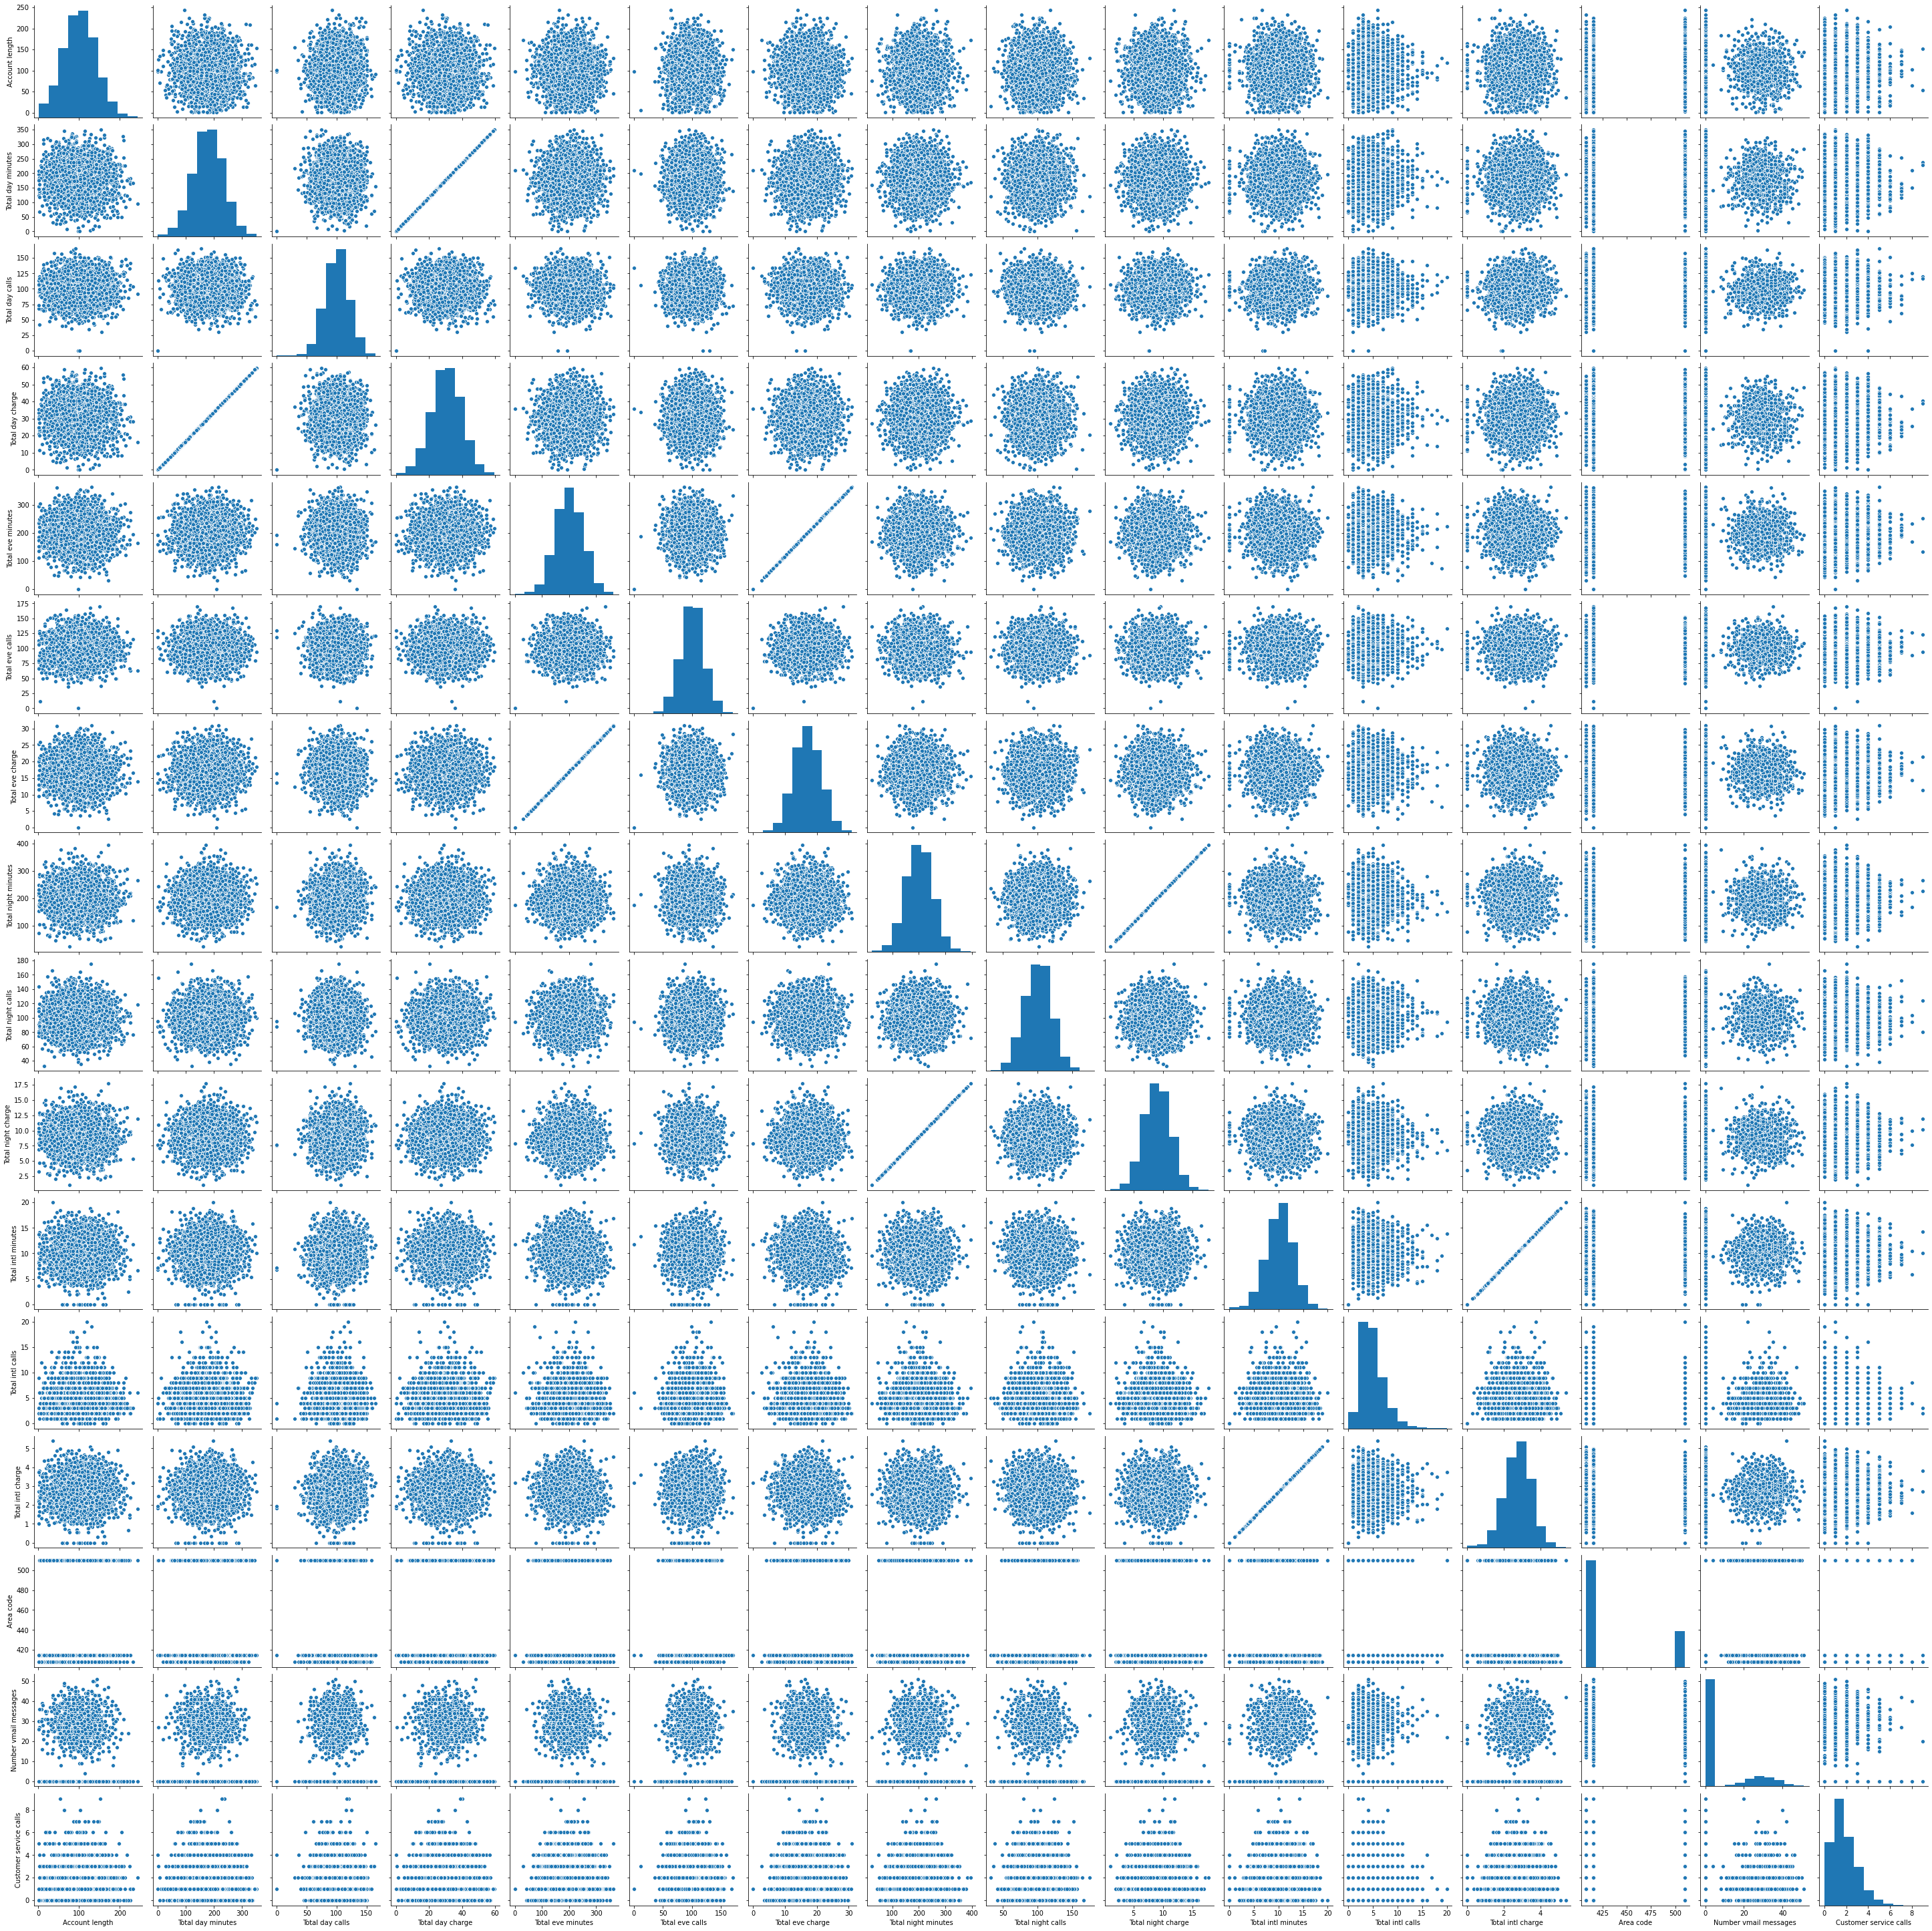

In [41]:
sns.pairplot(df[numerical_columns + categorical_columns])

## Data Processing